In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('airline_data.csv')
df.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [37]:
#Lets check the shape
df.shape

(10683, 11)

In [38]:
#Lets check the datatypes
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [39]:
#Lets check out the column names
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [40]:
#Lets drop some columns which are not that much relevant for the model
df.drop(['Airline','Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [41]:
df.head(15)

,Source,Destination,Route,Total_Stops,Additional_Info,Price
0,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897
1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662
2,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882
3,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218
4,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302
5,Kolkata,Banglore,CCU ? BLR,non-stop,No info,3873
6,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087
7,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,No info,22270
8,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087
9,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,8625


In [42]:
#Lets check value counts for Source
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [43]:
#Lets check the value counts for Destination
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [44]:
df.drop(['Route'],axis=1,inplace=True)

In [45]:
df.head(15)

,Source,Destination,Total_Stops,Additional_Info,Price
0,Banglore,New Delhi,non-stop,No info,3897
1,Kolkata,Banglore,2 stops,No info,7662
2,Delhi,Cochin,2 stops,No info,13882
3,Kolkata,Banglore,1 stop,No info,6218
4,Banglore,New Delhi,1 stop,No info,13302
5,Kolkata,Banglore,non-stop,No info,3873
6,Banglore,New Delhi,1 stop,In-flight meal not included,11087
7,Banglore,New Delhi,1 stop,No info,22270
8,Banglore,New Delhi,1 stop,In-flight meal not included,11087
9,Delhi,Cochin,1 stop,No info,8625


In [46]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [48]:
#Lets delete additional info column as well as it contains more than 80 % No info
df.drop(['Additional_Info'],axis=1,inplace=True)


In [49]:
df.head(15)

,Source,Destination,Total_Stops,Price
0,Banglore,New Delhi,non-stop,3897
1,Kolkata,Banglore,2 stops,7662
2,Delhi,Cochin,2 stops,13882
3,Kolkata,Banglore,1 stop,6218
4,Banglore,New Delhi,1 stop,13302
5,Kolkata,Banglore,non-stop,3873
6,Banglore,New Delhi,1 stop,11087
7,Banglore,New Delhi,1 stop,22270
8,Banglore,New Delhi,1 stop,11087
9,Delhi,Cochin,1 stop,8625


In [50]:
#Lets convert Source column into the numerical Values
source = pd.get_dummies(df['Source'],drop_first=True)

In [51]:
#Lets delete source column to concat the values
df.drop(['Source'],axis=1,inplace=True)

In [52]:
df = pd.concat([df,source],axis=1)

In [53]:
df.head(15)

,Destination,Total_Stops,Price,Chennai,Delhi,Kolkata,Mumbai
0,New Delhi,non-stop,3897,0,0,0,0
1,Banglore,2 stops,7662,0,0,1,0
2,Cochin,2 stops,13882,0,1,0,0
3,Banglore,1 stop,6218,0,0,1,0
4,New Delhi,1 stop,13302,0,0,0,0
5,Banglore,non-stop,3873,0,0,1,0
6,New Delhi,1 stop,11087,0,0,0,0
7,New Delhi,1 stop,22270,0,0,0,0
8,New Delhi,1 stop,11087,0,0,0,0
9,Cochin,1 stop,8625,0,1,0,0


In [54]:
#Lets convert Total_Stop column
total_stops = pd.get_dummies(df['Total_Stops'],drop_first=True)

In [55]:
total_stops

,2 stops,3 stops,4 stops,non-stop
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,0,1
10679,0,0,0,1
10680,0,0,0,1
10681,0,0,0,1


In [56]:
#Lets drop Total_Stop column
df.drop(['Total_Stops'],axis=1,inplace=True)

In [57]:
df = pd.concat([df,total_stops],axis=1)

In [58]:
df.head(15)

,Destination,Price,Chennai,Delhi,Kolkata,Mumbai,2 stops,3 stops,4 stops,non-stop
0,New Delhi,3897,0,0,0,0,0,0,0,1
1,Banglore,7662,0,0,1,0,1,0,0,0
2,Cochin,13882,0,1,0,0,1,0,0,0
3,Banglore,6218,0,0,1,0,0,0,0,0
4,New Delhi,13302,0,0,0,0,0,0,0,0
5,Banglore,3873,0,0,1,0,0,0,0,1
6,New Delhi,11087,0,0,0,0,0,0,0,0
7,New Delhi,22270,0,0,0,0,0,0,0,0
8,New Delhi,11087,0,0,0,0,0,0,0,0
9,Cochin,8625,0,1,0,0,0,0,0,0


In [59]:
#Lets change the names of the column so that we can go ahead with the Destination column as well
df = df.rename(columns={'Chennai':'chennai','Delhi':'delhi','Kolkata':'kolkata','Mumbai':'mumbai'})

In [60]:
destination = pd.get_dummies(df['Destination'],drop_first=True)

In [61]:
#Lets drop Destination column
df.drop(['Destination'],axis=1,inplace=True)

In [62]:
df= pd.concat([df,destination],axis=1)

In [63]:
df.head(15)

,Price,chennai,delhi,kolkata,mumbai,2 stops,3 stops,4 stops,non-stop,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7662,0,0,1,0,1,0,0,0,0,0,0,0,0
2,13882,0,1,0,0,1,0,0,0,1,0,0,0,0
3,6218,0,0,1,0,0,0,0,0,0,0,0,0,0
4,13302,0,0,0,0,0,0,0,0,0,0,0,0,1
5,3873,0,0,1,0,0,0,0,1,0,0,0,0,0
6,11087,0,0,0,0,0,0,0,0,0,0,0,0,1
7,22270,0,0,0,0,0,0,0,0,0,0,0,0,1
8,11087,0,0,0,0,0,0,0,0,0,0,0,0,1
9,8625,0,1,0,0,0,0,0,0,1,0,0,0,0


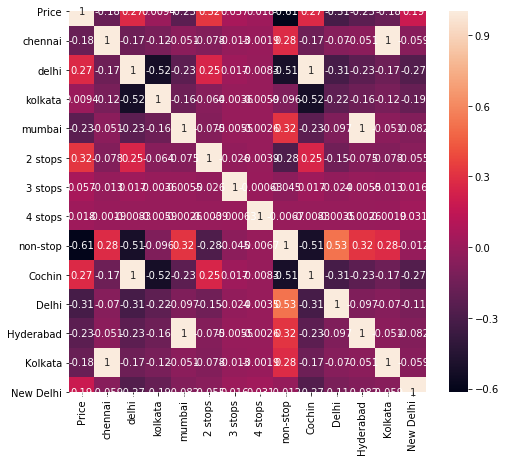

In [64]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

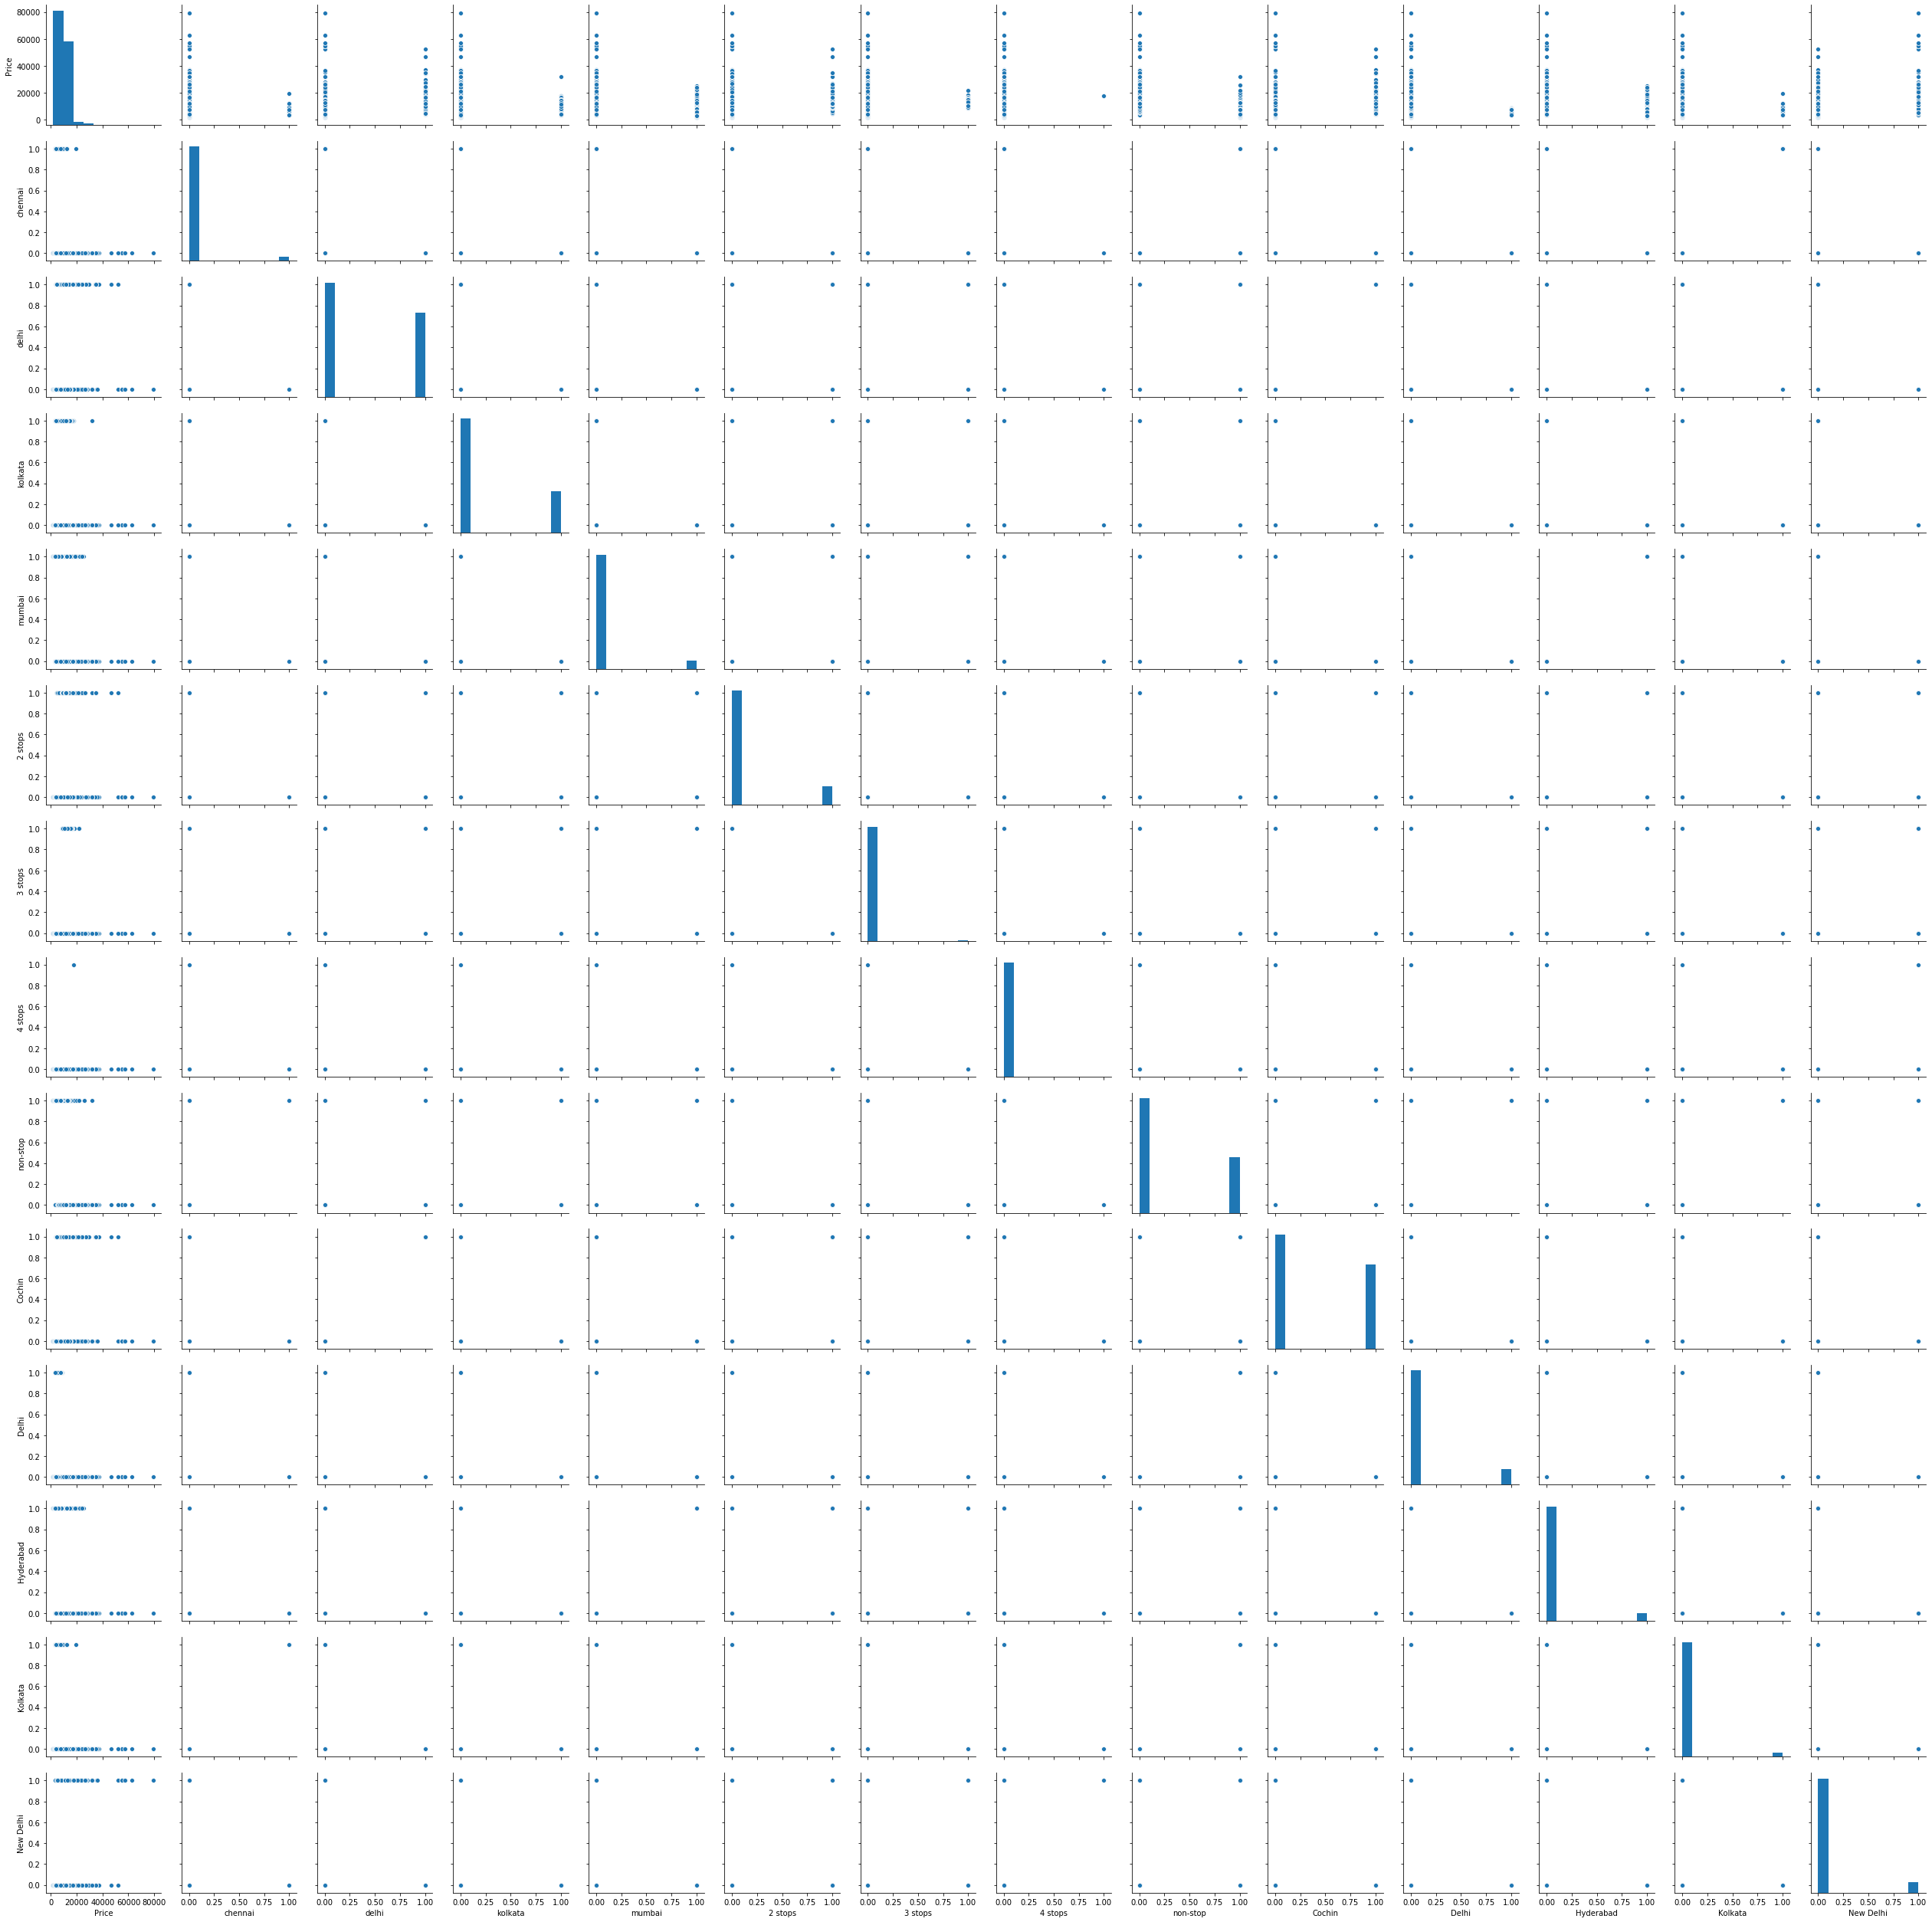

In [65]:
#lets check the regression parameters by pairplot
sns.pairplot(df)
plt.show()
#as per the plots and diagram shown in a graphical representation we can see this is a clear problem of linear regression
#so we will go ahead for the prediction with linear regression model

In [66]:
#Lets check the skewness
df.skew()

Price          1.812552
chennai        5.008333
delhi          0.304745
kolkata        1.043466
mumbai         3.521420
2 stops        2.048256
3 stops       15.312416
4 stops      103.358599
non-stop       0.738721
Cochin         0.304745
Delhi          2.362402
Hyderabad      3.521420
Kolkata        5.008333
New Delhi      2.925821
dtype: float64

In [67]:
#change the values in each columns by replacing log1 values
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [68]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(10683, 14)
(8635, 14)


In [69]:
#lets separate x and y
df_x = df_final.drop(columns=["Price"],axis=1)
y = df_final[["Price"]]

In [70]:
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [71]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [72]:
print(x_train.shape,x_test.shape)

(6044, 13) (2591, 13)


In [75]:
#lets create a function to call 

def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max r2 corrosponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [76]:
#lets apply first algorithm
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.5420118951780699
r2 score corresponding to 43 is 0.5266350794685766
r2 score corresponding to 44 is 0.5358449159932588
r2 score corresponding to 45 is 0.5371351117557835
r2 score corresponding to 46 is 0.5285045970345329
r2 score corresponding to 47 is 0.5442912543472682
r2 score corresponding to 48 is 0.5305736651940651
r2 score corresponding to 49 is 0.5403117410988278
r2 score corresponding to 50 is 0.5622573363599435
r2 score corresponding to 51 is 0.5235329093300398
r2 score corresponding to 52 is 0.5267166249113737
r2 score corresponding to 53 is 0.5405941432715207
r2 score corresponding to 54 is 0.5509431987977838
r2 score corresponding to 55 is 0.5408067822259409
r2 score corresponding to 56 is 0.5431744079805207
r2 score corresponding to 57 is 0.5215759434652305
r2 score corresponding to 58 is 0.5321471109460746
r2 score corresponding to 59 is 0.5494548415996663
r2 score corresponding to 60 is 0.5417268311134061
r2 score corresponding to 61 is

In [78]:
#Here it shows a nice max r score lets explore more and check 

In [77]:
#lets go for the next model and find out the best parameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors = {"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors , cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [79]:
#lets apply and get the r2 score
knr = KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.5129724237857529
r2 score corresponding to 43 is 0.5353749412242701
r2 score corresponding to 44 is 0.5226965501577732
r2 score corresponding to 45 is 0.5402210681348695
r2 score corresponding to 46 is 0.516918031077275
r2 score corresponding to 47 is 0.5209924493344393
r2 score corresponding to 48 is 0.5399435505752916
r2 score corresponding to 49 is 0.5367255154958797
r2 score corresponding to 50 is 0.562298675866375
r2 score corresponding to 51 is 0.5206072425373568
r2 score corresponding to 52 is 0.536370610765534
r2 score corresponding to 53 is 0.5492148382865794
r2 score corresponding to 54 is 0.5472527521261807
r2 score corresponding to 55 is 0.5156165915660005
r2 score corresponding to 56 is 0.5535249876145572
r2 score corresponding to 57 is 0.49623925490081433
r2 score corresponding to 58 is 0.5264324402981007
r2 score corresponding to 59 is 0.5459979649186141
r2 score corresponding to 60 is 0.5504441784141463
r2 score corresponding to 61 is 0

In [80]:
#lets check mean r2 score of both of linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print("mean r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("mean r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

mean r2 score of linear regression is  0.5374948962702719
mean standard deviation in r2 score of linear regression is  0.019988238865004462

mean r2 score of knn regression is  0.5433136023334555
mean standard deviation in r2 score of knn regression is  0.020513672320798006


In [81]:
#lets check laso regression 
from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {"alpha":[0.001,0.01,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [82]:
lsreg = Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.5430761688636505
r2 score corresponding to 43 is 0.5269064580078364
r2 score corresponding to 44 is 0.5364336780749265
r2 score corresponding to 45 is 0.5375042599902129
r2 score corresponding to 46 is 0.5294364449118871
r2 score corresponding to 47 is 0.5442454131343657
r2 score corresponding to 48 is 0.5311850991146776
r2 score corresponding to 49 is 0.5399891953994338
r2 score corresponding to 50 is 0.5618103783127089
r2 score corresponding to 51 is 0.5252150596828244
r2 score corresponding to 52 is 0.527317122361729
r2 score corresponding to 53 is 0.5405025263597909
r2 score corresponding to 54 is 0.5509753580578017
r2 score corresponding to 55 is 0.5409245109087998
r2 score corresponding to 56 is 0.5431101767120436
r2 score corresponding to 57 is 0.521764631399419
r2 score corresponding to 58 is 0.5314536281063966
r2 score corresponding to 59 is 0.5494130674568651
r2 score corresponding to 60 is 0.5415731030053845
r2 score corresponding to 61 is 0

In [83]:
print("mean r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of Lasso regression is  0.5377000781827744
mean standard deviation in r2 score of Lasso regression is  0.01987937852567644



In [84]:
#now we will try to use gradiant boosting techniques
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [85]:
gbr = GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print("mean r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of gb regression is  0.5505494619907673
mean standard deviation in r2 score of gb regression is  0.017164966694671668



In [86]:
#after applying these algorithms i came to know that Lasso model is a good one 
#So i will go ahead with Lasso model

from sklearn.externals import joblib


In [87]:
joblib.dump(lsreg, 'flight_Model.pkl')

['flight_Model.pkl']